In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:

from sklearn.preprocessing import StandardScaler
features_to_scale = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
scaler = StandardScaler()


df1 = df.copy()
df1[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check final scaled features
print(df1[features_to_scale].head())
joblib.dump(scaler, "scalerss.pkl")


        age  trestbps      chol   thalach   oldpeak
0 -0.268437 -0.377636 -0.659332  0.821321 -0.060888
1 -0.158157  0.479107 -0.833861  0.255968  1.727137
2  1.716595  0.764688 -1.396233 -1.048692  1.301417
3  0.724079  0.936037 -0.833861  0.516900 -0.912329
4  0.834359  0.364875  0.930822 -1.874977  0.705408


['scalerss.pkl']

In [7]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


In [8]:
X = df1.drop("target", axis=1)
y = df1["target"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8146341463414634
Confusion Matrix:
 [[70 30]
 [ 8 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



In [12]:
y_tpred = model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_tpred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_tpred))
print("Classification Report:\n", classification_report(y_train, y_tpred))

Accuracy: 0.848780487804878
Confusion Matrix:
 [[311  88]
 [ 36 385]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       399
           1       0.81      0.91      0.86       421

    accuracy                           0.85       820
   macro avg       0.86      0.85      0.85       820
weighted avg       0.85      0.85      0.85       820



In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)


{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.8548780487804878


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


param_distributions = {
    'C': uniform(loc=0.01, scale=10), 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=20,  
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D818322330>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [15]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Best Parameters: {'C': 0.21584494295802448, 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.8524390243902438


In [16]:
best_random_model = random_search.best_estimator_
y_pred = best_random_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8146341463414634
Confusion Matrix:
 [[70 30]
 [ 8 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



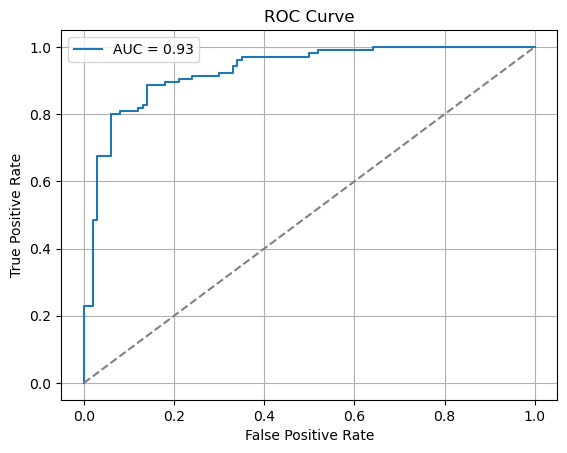

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = best_random_model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import numpy as np

# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
sample_input = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 1, 2.3, 0, 0, 1]])

# Predict
prediction = model.predict(sample_input)
print("Prediction:", prediction[0])  #0 means disease


Prediction: 0


C:\Users\nakul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
import joblib

joblib.dump(model, "models.pkl")


['models.pkl']

In [20]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [21]:
import pandas as pd

# Sample batch input (standardized values) with feature column names
batch_inputs = pd.DataFrame([
    {
        'age': -0.5, 'sex': 1, 'cp': 0, 'trestbps': -0.4, 'chol': -0.6, 'fbs': 0,
        'restecg': 1, 'thalach': 0.9, 'exang': 0, 'oldpeak': -0.3, 'slope': 2, 'ca': 0, 'thal': 3
    },  # No disease
    {
        'age': 1.0, 'sex': 0, 'cp': 2, 'trestbps': 1.1, 'chol': 1.4, 'fbs': 1,
        'restecg': 0, 'thalach': -0.9, 'exang': 1, 'oldpeak': 2.2, 'slope': 0, 'ca': 2, 'thal': 7
    },  # Disease
    {
        'age': -0.6, 'sex': 1, 'cp': 1, 'trestbps': -0.5, 'chol': -0.5, 'fbs': 0,
        'restecg': 1, 'thalach': 0.7, 'exang': 0, 'oldpeak': -0.2, 'slope': 2, 'ca': 0, 'thal': 3
    },  # No disease
    {
        'age': 0.9, 'sex': 1, 'cp': 0, 'trestbps': 0.9, 'chol': 1.1, 'fbs': 0,
        'restecg': 0, 'thalach': -0.6, 'exang': 1, 'oldpeak': 1.9, 'slope': 1, 'ca': 3, 'thal': 6
    },  # Disease
    {
        'age': 0.0, 'sex': 0, 'cp': 3, 'trestbps': 0.1, 'chol': 0.2, 'fbs': 0,
        'restecg': 1, 'thalach': 1.0, 'exang': 0, 'oldpeak': -0.4, 'slope': 2, 'ca': 0, 'thal': 3
    },  # No disease
])

# Predict
predictions = model.predict(batch_inputs)

print("Predictions:", predictions)


Predictions: [1 0 1 0 1]
